In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.io import fits
from scipy.signal import find_peaks
from calibrator import Calibrator

/usr/local/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
def load_calibration_lines(input_file='calibration_lines.csv',
                           elements=["Hg", "Ar", "Xe", "CuNeAr", "Kr"],
                           min_wavelength=100,
                           max_wavelength=1000):
    cal_lines = np.loadtxt(input_file, delimiter=',', dtype='U', skiprows=1)
    wave = cal_lines[:, 0].astype('float')
    element = cal_lines[:, 1]
    # Get lines of the requested elements
    lines = wave[np.isin(element, elements)]
    # Get only lines within the requested wavelength
    mask = (lines > min_wavelength) * (lines < max_wavelength)
    return lines[mask]

In [3]:
atlas = load_calibration_lines(
    "calibration_lines.csv", elements=["Xe"], min_wavelength=400, max_wavelength=800)
print(atlas)

spectrum = np.median(fits.open('v_a_20190516_55_1_0_1.fits')[0].data[100:120], axis=0)

peaks, _ = find_peaks(spectrum, distance=10., threshold=20.)
print(peaks)

[419.35 438.39 450.1  452.47 458.28 462.43 467.12 473.42 480.7  491.99
 502.83 539.28 582.39 618.24 631.81 666.89 672.8  711.96 728.43 758.47
 764.2 ]
[ 269  280  294  317  335  359  477  530  553  624  635  672  709  721
  752  763  773  783  803  836  860  871  901  912  963  980 1000]


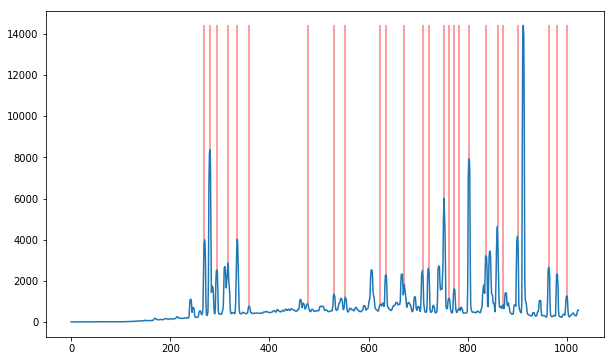

In [4]:
plt.figure(figsize=(10,6))
plt.plot(spectrum)
plt.vlines(peaks,
              spectrum[peaks.astype('int')],
              spectrum.max(),
              colors='red',
              alpha=0.5)

In [5]:
c = Calibrator(peaks, atlas)
c.set_fit_constraints(
    min_slope=0.2,
    max_slope=0.8,
    min_intercept=200.,
    max_intercept=500.,
    fit_tolerance=0.5,
    line_fit_thresh=2,
    thresh=5,
    polydeg=5,
    fittype='poly')

# Providing known pixel-wavelength mapping
c.set_known_pairs([269, 635.6024, 803.5022, 912], [462.428, 631.806, 711.96, 764.202])
best_p = c.fit(sample_size=10, max_tries=10000, top_n=10)


[-8.55703761e-13  2.48305756e-09 -2.80457538e-06  1.56291488e-03
  3.33267134e-02  3.83117716e+02]


None
Error too large


None
Error too large


None
Error too large


None
Error too large


/Users/marcolam/git/rascal/calibrator.py:171: RankWarning: Polyfit may be poorly conditioned
  best_p = self.polyfit(x[best_inliers], y[best_inliers], polydeg)
/Users/marcolam/git/rascal/calibrator.py:171: RankWarning: Polyfit may be poorly conditioned
  best_p = self.polyfit(x[best_inliers], y[best_inliers], polydeg)
/Users/marcolam/git/rascal/calibrator.py:171: RankWarning: Polyfit may be poorly conditioned
  best_p = self.polyfit(x[best_inliers], y[best_inliers], polydeg)


[-1.21257492e-11  3.14830856e-08 -3.06666685e-05  1.40815296e-02
 -2.62640607e+00  5.99121063e+02]


None
Error too large


/Users/marcolam/git/rascal/calibrator.py:171: RankWarning: Polyfit may be poorly conditioned
  best_p = self.polyfit(x[best_inliers], y[best_inliers], polydeg)
/Users/marcolam/git/rascal/calibrator.py:171: RankWarning: Polyfit may be poorly conditioned
  best_p = self.polyfit(x[best_inliers], y[best_inliers], polydeg)
/Users/marcolam/git/rascal/calibrator.py:171: RankWarning: Polyfit may be poorly conditioned
  best_p = self.polyfit(x[best_inliers], y[best_inliers], polydeg)
/Users/marcolam/git/rascal/calibrator.py:171: RankWarning: Polyfit may be poorly conditioned
  best_p = self.polyfit(x[best_inliers], y[best_inliers], polydeg)
/Users/marcolam/git/rascal/calibrator.py:171: RankWarning: Polyfit may be poorly conditioned
  best_p = self.polyfit(x[best_inliers], y[best_inliers], polydeg)


[ 3.70254674e-09 -3.32956287e-06  6.36949330e-04  2.22798115e-01
 -9.54029760e+01  9.81456812e+03]


None
Error too large


[-1.95138557e-10  4.39925348e-07 -3.62262660e-04  1.41182635e-01
 -2.60497466e+01  2.27653348e+03]
Invalid fit



Peak at: 462.38162175124495 nm
- matched to 462.43 nm
Peak at: 467.2052480108365 nm
- matched to 467.12 nm
Peak at: 473.40929280102466 nm
- matched to 473.42 nm
Peak at: 483.73308964395534 nm
Peak at: 491.9036350580855 nm
- matched to 491.99 nm
Peak at: 502.890874632857 nm
- matched to 502.83 nm
Peak at: 557.6544563648134 nm
Peak at: 582.4069339750753 nm
- matched to 582.39 nm
Peak at: 593.1721842512485 nm
Peak at: 626.5556612588164 nm
Peak at: 631.7552351550187 nm
- matched to 631.81 nm
Peak at: 649.3115559011462 nm
Peak at: 666.9758957301086 nm
- matched to 666.89 nm
Peak at: 672.7272200916291 nm
- matched to 672.8 nm
Peak at: 687.627415338388 nm
Peak at: 692.9260737718264 nm
Peak at: 697.746338269055 nm
Peak at: 702.5683640000875 nm
Peak at: 712.2113242270821 nm
- matched to 711.96 nm
Peak at: 728.0824895251685 nm
- matched to 728.43 nm
Peak at: 739.550115486812 nm
Peak at: 744.7715964527515 nm
Peak at: 758.851644344232 nm
- matched to 758.47 nm
Peak at: 763.9385846976495 nm
- match

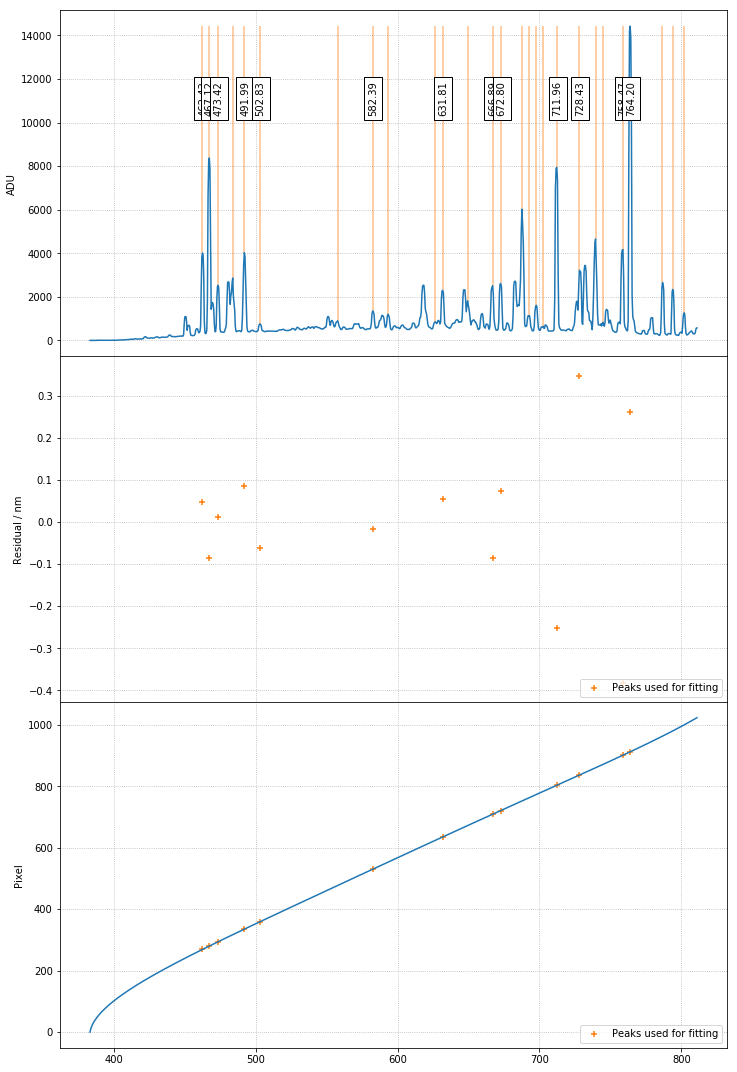

In [6]:
c.plot_fit(spectrum, best_p)